In [229]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [230]:
os.chdir("D:\Documents\dataset(dell)\DGA_ecommerce_casestudy")
df = pd.read_csv("orders_dataset.csv")
cnf = df[(df['order_status'] == 'delivered')]
cnf = cnf.filter(['order_purchase_timestamp'])

In [231]:
cnf.isnull().sum()

order_purchase_timestamp    0
dtype: int64

In [232]:
cnf['count'] = 1

In [233]:
cnf.order_purchase_timestamp = pd.to_datetime(cnf.iloc[:,0])

In [234]:
res = cnf.groupby('order_purchase_timestamp')['count'].sum().reset_index()

In [235]:
res = res.set_index('order_purchase_timestamp')

In [236]:
y = res['count'].resample('W').sum()

In [237]:
#removing 2016 rows as they have inconsistent data
y = y.iloc[16:]

In [238]:
y = y.head(-1)

In [239]:
y.shape

(86,)

<IPython.core.display.Javascript object>


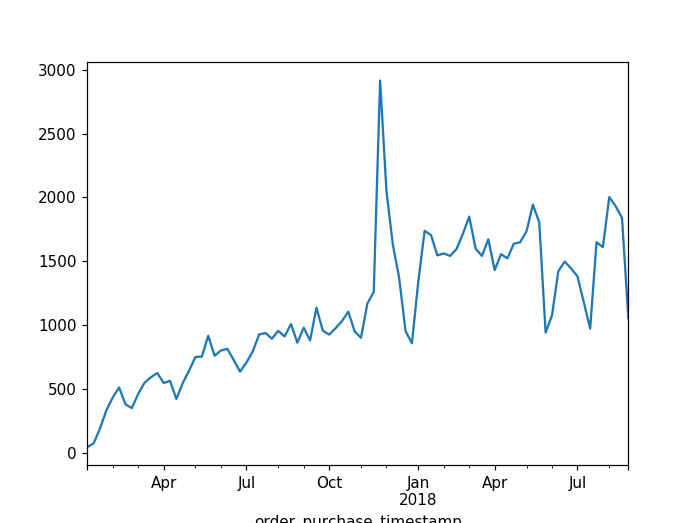

In [227]:
y.plot()
plt.show()

In [286]:
train=y[0:75] 
test=y[74:87]

In [287]:
test 

order_purchase_timestamp
2018-06-10    1422
2018-06-17    1497
2018-06-24    1443
2018-07-01    1382
2018-07-08    1178
2018-07-15     972
2018-07-22    1649
2018-07-29    1610
2018-08-05    2002
2018-08-12    1931
2018-08-19    1839
2018-08-26    1054
Freq: W-SUN, Name: count, dtype: int64

In [307]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test
y_hat_avg = y_hat_avg.to_frame() 
fit2 = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['count'] = fit2.forecast(len(test))

In [308]:
y_hat_avg = y_hat_avg.head(-1)

<IPython.core.display.Javascript object>


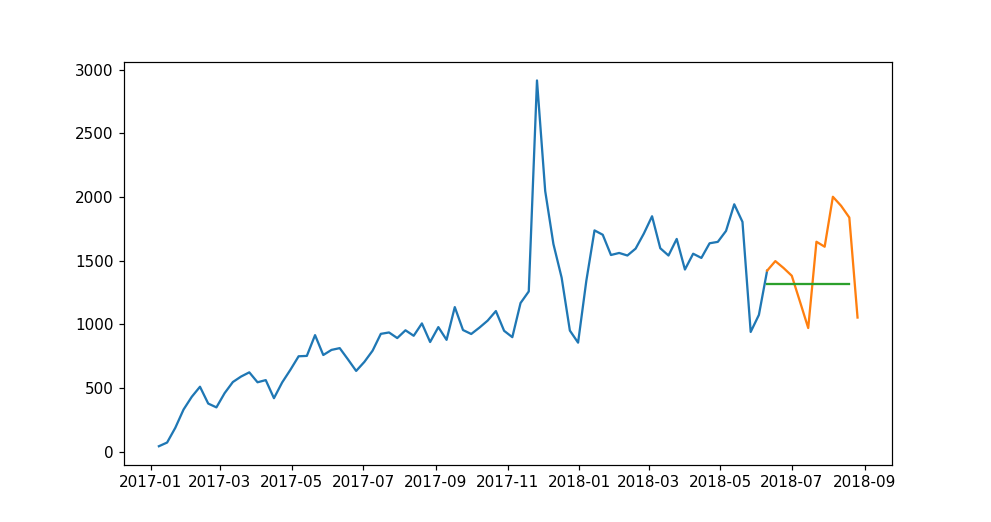

In [309]:
#this prediction is for already present data
#as we can see the simple exponential smoothing method gives quite sober predictions
#after this we will predict for the next 12 week ie. the next quarter!
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg, label='SES')

In [310]:
#hence we get a prediction of 1375.34 as the number of sales
fit3 = SimpleExpSmoothing(np.asarray(y)).fit(smoothing_level=0.6,optimized=False)
fit3.forecast(12)

array([1375.34051744, 1375.34051744, 1375.34051744, 1375.34051744,
       1375.34051744, 1375.34051744, 1375.34051744, 1375.34051744,
       1375.34051744, 1375.34051744, 1375.34051744, 1375.34051744])